In [1]:
import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
AE3= np.array(pd.read_csv ('../data/processed_data/AE3.csv'))
y = np.array(AE3[:,-1],dtype=int)
AE3 = AE3[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(AE3,y)

In [5]:
print(AE3.shape, len(pred))
acc = model.score_
print(acc)

(333, 5778) 333
0.3159509202453988


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (103.0, 223.0, 0.4618834080717489, 0.37050359712230213, 0.9921779087305763, 0.3159509202453988, 0.9938512350233653, 0.6840490797546013, 0.6294964028776978)


# Mutual information maximizer (MIM)

test 0.500318312005778 0.12440248004497897
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (183.0, 218.0, 0.8394495412844036, 0.7204724409448819, 0.9846142988213706, 0.456359102244389, 0.9949365283126516, 0.543640897755611, 0.2795275590551181)


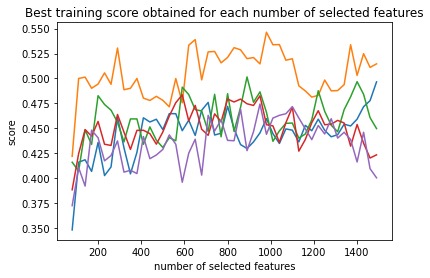

In [7]:
#Define parameters for MIM method
N = np.arange(80,1500,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

# Anova F test

test 0.5050293179518975 0.06309170706122079
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (177.0, 207.0, 0.855072463768116, 0.6321428571428571, 0.988571113074205, 0.4609375, 0.9942803198578409, 0.5390625, 0.3678571428571429)


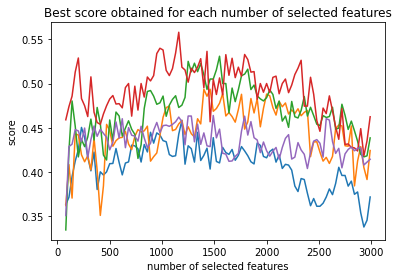

In [8]:
#Define parameters for ANOVA method
N = np.arange(80,3000,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

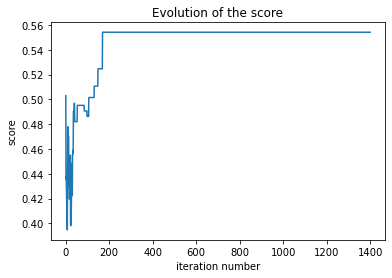

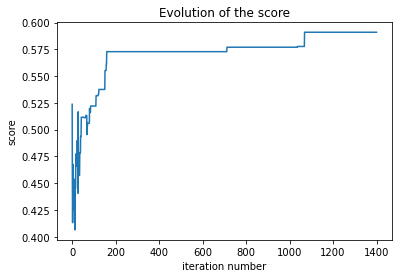

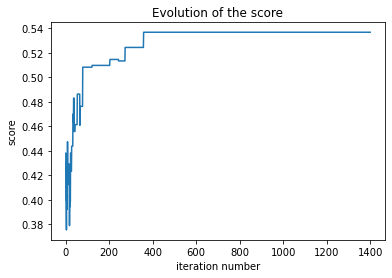

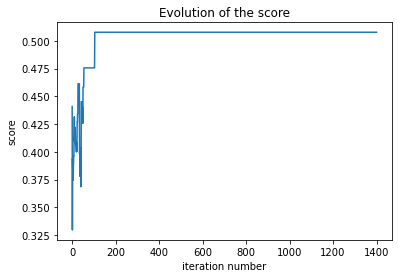

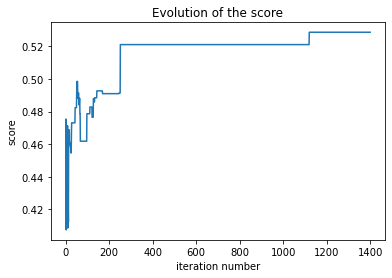

test 0.5302438506311775 0.10916047811596566
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (194.0, 236.0, 0.8220338983050848, 0.7637795275590551, 0.981042654028436, 0.4511627906976744, 0.9951112197506722, 0.5488372093023256, 0.23622047244094488)


In [9]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.1, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [10]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,AE3, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = AE3[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

KeyboardInterrupt: 